In [1]:
!pip install networkx[default]
!pip install matplotlib

import matplotlib.pyplot as plt
from parse import *
import numpy as np
from pprint import pprint
import networkx as nx
from networkx import Graph
from itertools import combinations

cardinalToCoord = {
    "n":[0,-1],
    "e":[+1,0],
    "s":[0,+1],
    "w":[-1,0],
}

tileToDirection = {
    "3": {"w", "e"},
    "5": {"s", "e"},
    "6": {"s", "w"},
    "7": {"s", "e", "w"},
    "9": {"n", "e"},
    "A": {"w", "n"},
    "B": {"w", "n", "e"},
    "C": {"n", "s"},
    "D": {"n", "s", "e"},
    "E": {"n", "s", "w"},
    "F": {"n", "s", "w", "e"}
}

def connectedTo(coordinate:np.array(2), directions) -> list[tuple]:
    connections = []
    for direction in directions:
        connections.append(tuple(np.array(coordinate)+np.array(cardinalToCoord[direction])))
    return connections


In [2]:
connectedTo([1,1],tiles[0]["direction"])


[(2, 1), (0, 1)]

In [3]:
def evaluate(state: list[list[int | str]]) -> int:
    # sub grid with the same [0,0] but twice the density so all edges a coord
    graph = Graph()

    for GP in goldenPoints:
        graph.add_node((GP["x"], GP["y"]))
        graph.add_nodes_from(connectedTo((GP["x"], GP["y"]), ["n", "e", "s", "w"]))
        graph.add_edges_from(zip([(GP["x"], GP["y"])] * 4, connectedTo((GP["x"], GP["y"]), ["n", "e", "s", "w"])))

    for tile in state:
        graph.add_node((tile[1], tile[2]))
        connections = connectedTo((tile[1], tile[2]), tileToDirection[tile[0]])
        for connection in connections:
            graph.add_edges_from([((tile[1], tile[2]), connection)])
    
    score = 0
    for tile in state:
        score -= costs[tile[0]]
    
    for GPpair in combinations([(GP["x"], GP["y"]) for GP in goldenPoints], 2):
        print(GPpair)
    
    
    nx.draw(graph, with_labels=True)

In [4]:
list(combinations([1,2,3], 2))

[(1, 2), (1, 3), (2, 3)]

((2, 4), (7, 2))
((2, 4), (6, 6))
((7, 2), (6, 6))


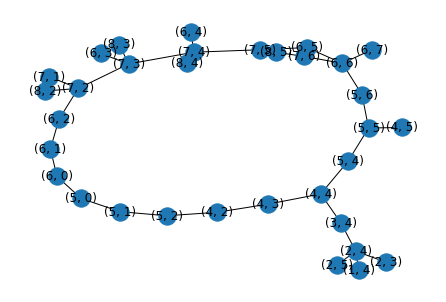

In [5]:
evaluate([
    ["3", 3, 4],
    ["B", 4, 4],
    ["C", 4, 3],
    ["5", 4, 2],
    ["A", 5, 2],
    ["C", 5, 1],
    ["5", 5, 0],
    ["6", 6, 0],
    ["C", 6, 1],
    ["9", 6, 2],
    ["F", 7, 3],
    ["F", 7, 4],
    ["F", 7, 5],
    ["A", 7, 6],
    ["9", 5, 6],
    ["E", 5, 5],
    ["6", 5, 4]
])

In [6]:
print(costs)

{'3': 6, '5': 2, '6': 2, '7': 8, '9': 2, 'A': 2, 'B': 8, 'C': 6, 'D': 8, 'E': 8, 'F': 15}
